# MADStat

In [1]:
import pandas as pd
import xgi
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib import colors
import matplotlib

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'savefig.bbox': 'tight',
    'savefig.transparent':True})

In [2]:
madstat = pd.read_pickle("./derived_data/hlrc_hfrc.pkl")
madstat.head()

,idxPap,edges,year,journal,hlrc,hfrc
0,1,"[16118, 24934, 46252, 46442]",2014,Bcs,0.034524,-6
1,2,"[17528, 22080, 24306, 25297, 34423, 46604, 46851]",2014,Bcs,0.289129,-88
2,3,"[5140, 23393, 26434]",2014,Bcs,-0.365079,-57
3,4,"[19477, 22801, 31195, 37481]",2014,Bcs,-0.152244,-35
4,5,"[7154, 10981, 29847, 34337, 46127]",2014,Bcs,0.219958,-35


In [3]:
with open('../../data/raw/MADStat/author_name.txt', 'r') as f:
    autNam = [line.strip() for line in f]
Au = pd.DataFrame(autNam, columns=["Au"])

## HLRC by Journal

In [4]:
madstat_jrnl_hlrc = (
    madstat.groupby("journal", as_index=False)["hlrc"]
    .median()
    .sort_values("hlrc")
)
sorted_journals = madstat_jrnl_hlrc["journal"].tolist()

cmap = matplotlib.colormaps.get_cmap('RdYlBu_r')
norm = colors.Normalize(
    vmin=madstat_jrnl_hlrc['hlrc'].min(),
    vmax=madstat_jrnl_hlrc['hlrc'].max()
)
madstat_jrnl_hlrc['color'] = madstat_jrnl_hlrc['hlrc'].map(lambda x: cmap(norm(x)))

palette = dict(zip(sorted_journals, madstat_jrnl_hlrc['color']))

/tmp/ipykernel_924792/2710660883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=madstat, x="journal", y="hlrc", order=sorted_journals,palette=palette);


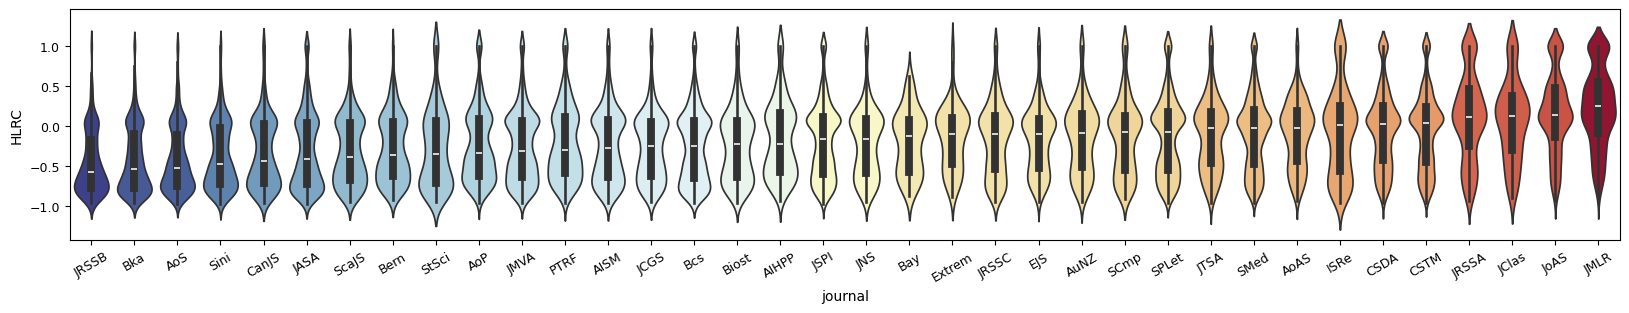

In [5]:
plt.figure(figsize=(20, 3))
sns.violinplot(data=madstat, x="journal", y="hlrc", order=sorted_journals,palette=palette);
plt.xticks(rotation=30);
plt.ylabel("HLRC")
plt.savefig("./figures/MADStat_HLRC_by_journal.pdf",bbox_inches='tight');

## HFRC by Journal

In [6]:
madstat_jrnl_hfrc = (
    madstat.groupby("journal", as_index=False)["hfrc"]
    .median()
    .sort_values("hfrc")
)
sorted_journals = madstat_jrnl_hfrc["journal"].tolist()

cmap = matplotlib.colormaps.get_cmap('RdYlBu_r')
norm = colors.Normalize(
    vmin=madstat_jrnl_hfrc['hfrc'].min(),
    vmax=madstat_jrnl_hfrc['hfrc'].max()
)
madstat_jrnl_hfrc['color'] = madstat_jrnl_hfrc['hfrc'].map(lambda x: cmap(norm(x)))

palette = dict(zip(sorted_journals, madstat_jrnl_hfrc['color']))

/tmp/ipykernel_924792/2654049394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=madstat, x="journal", y="hfrc", order=sorted_journals, palette=palette);


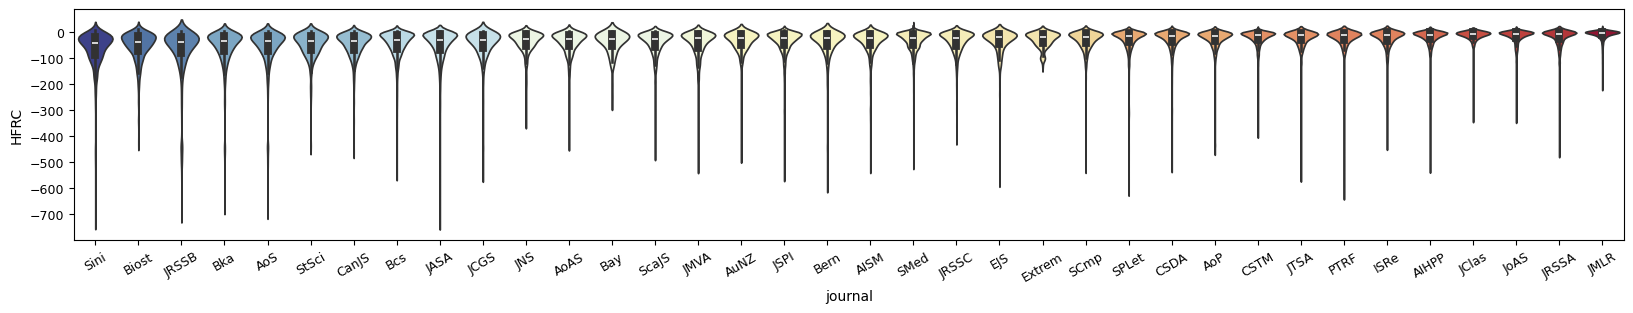

In [7]:
plt.figure(figsize=(20, 3))
sns.violinplot(data=madstat, x="journal", y="hfrc", order=sorted_journals, palette=palette);
plt.xticks(rotation=30);
plt.ylabel("HFRC")
plt.savefig("./figures/MADStat_HFRC_by_journal.pdf",bbox_inches='tight');

## HLRC by Year

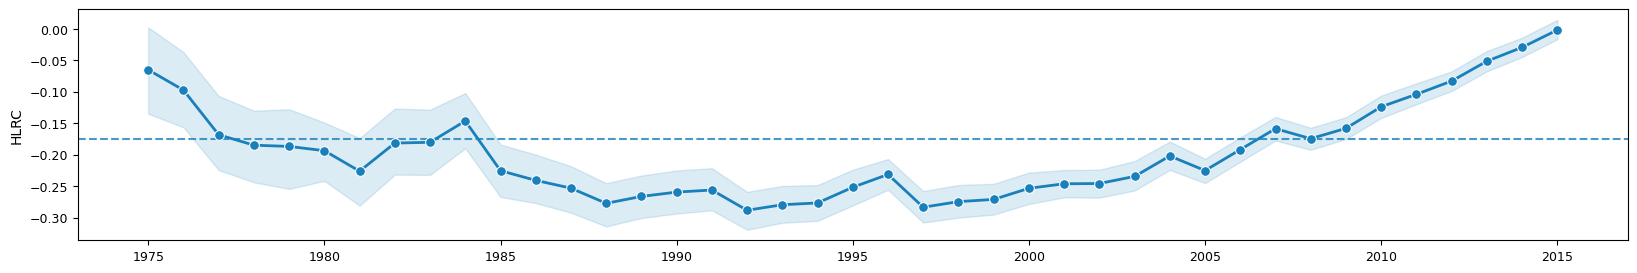

In [8]:
plt.figure(figsize=(20, 3))
plt.axhline(y=madstat["hlrc"].mean(), color='#1a80bb', linestyle='--', alpha=0.8)
sns.lineplot(data=madstat, x="year", y="hlrc",
    marker="o", markersize=7,color="#1a80bb",
    lw=2, err_style="band", err_kws={"alpha": 0.15})
plt.ylabel("HLRC")
plt.xlabel("");
plt.savefig("./figures/MADStat_HLRC_by_year.pdf",bbox_inches='tight');

## HFRC by Year

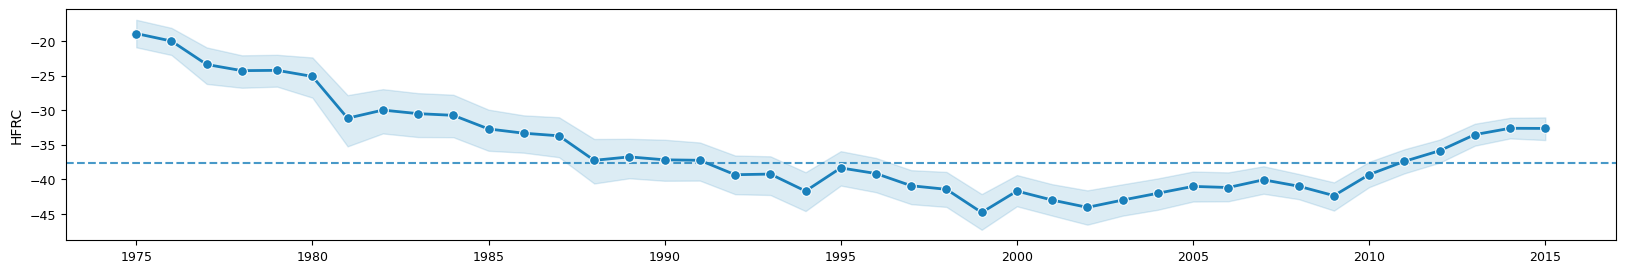

In [9]:
plt.figure(figsize=(20, 3))
plt.axhline(y=madstat["hfrc"].mean(), color='#1a80bb', linestyle='--', alpha=0.8)
sns.lineplot(data=madstat, x="year", y="hfrc",
    marker="o", markersize=7,color="#1a80bb",
    lw=2, err_style="band", err_kws={"alpha": 0.15})
plt.ylabel("HFRC")
plt.xlabel("");
plt.savefig("./figures/MADStat_HFRC_by_year.pdf",bbox_inches='tight');

## Subgraph around the most negative edge

In [5]:
madstat.sort_values("hlrc").iloc[0,]['edges']

[2040, 19151]

In [6]:
print("2020: ",Au.iloc[2039,0])
print("19151: ",Au.iloc[19150,0])

2020:  Narayanaswamy Balakrishnan
19151:  M. C. Jones


### SI-One-hop

In [7]:
# 1. authors index in the most negative edge (indexing starts from 1)
edge = madstat.sort_values("hlrc").iloc[0,]["edges"]
targets = set(edge)

# 2. authors collaborated with those in the most negative edge
one_hop_mask = madstat['edges'].apply(lambda lst: bool(set(lst) & targets))
one_hop = madstat[one_hop_mask]

one_hop.shape

(390, 6)

In [8]:
H = xgi.Hypergraph(one_hop['edges'].to_list())
# node position
node_pos = xgi.pairwise_spring_layout(H, seed=123, iterations=100)
# edge color
cmap = matplotlib.colormaps.get_cmap('RdYlBu_r')
edge_color = {key: cmap((hlrc+1)/2) for key, hlrc in enumerate(one_hop['hlrc'])}

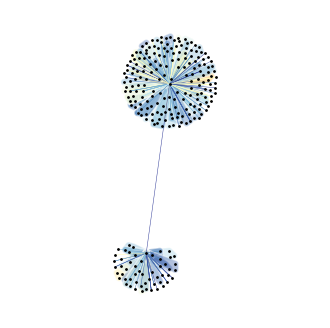

In [12]:
fig, ax = plt.subplots(figsize=(4,4))
xgi.draw(
    H, 
    pos=node_pos,
    node_size=1,
    node_ec = "black",
    node_fc = 'black',
    edge_fc= edge_color, # edge color
    edge_ec= "white",
    dyad_color=edge_color, # edge with size 2 color
    dyad_style="-",
    dyad_lw=0.35,
    alpha=0.4,
    hull = True,
    radius = 0.02,
    rescale_sizes=True);
plt.savefig('figures/one-hop(Narayanaswamy Balakrishnan,M. C. Jones).pdf')

In [13]:
madstat.sort_values("hlrc").iloc[1,]['edges']

[3399, 11453]

In [14]:
print("3399: ",Au.iloc[3398,0])
print("11453: ",Au.iloc[11452,0])

3399:  Peter Bickel
11453:  Jianqing Fan


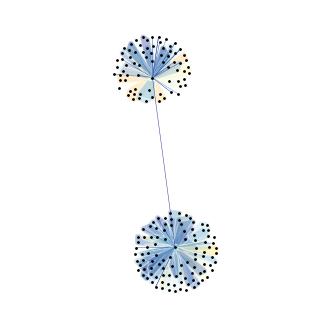

In [24]:
# 1. authors index in the most negative edge (indexing starts from 1)
edge = madstat.sort_values("hlrc").iloc[1,]["edges"]
targets = set(edge)

# 2. authors collaborated with those in the most negative edge
one_hop_mask = madstat['edges'].apply(lambda lst: bool(set(lst) & targets))
one_hop = madstat[one_hop_mask]

H = xgi.Hypergraph(one_hop['edges'].to_list())
node_pos = xgi.pairwise_spring_layout(H, seed=123, iterations=100)
cmap = matplotlib.colormaps.get_cmap('RdYlBu_r')
edge_color = {key: cmap((hlrc+1)/2) for key, hlrc in enumerate(one_hop['hlrc'])}

fig, ax = plt.subplots(figsize=(4,4))
xgi.draw( H, pos=node_pos, node_size=1, node_ec = "black", node_fc = 'black',
    edge_fc= edge_color,  edge_ec= "white", dyad_color=edge_color, # edge with size 2 color
    dyad_style="-", dyad_lw=0.35, alpha=0.4,
    hull = True, radius = 0.02, rescale_sizes=True);
# plt.savefig('figures/one-hop(Peter Bickel,Jianqing Fan).pdf')

In [17]:
madstat.sort_values("hlrc").iloc[2,]['edges']

[44493, 45659]

In [18]:
print("44493: ",Au.iloc[44492,0])
print("45659: ",Au.iloc[45658,0])

44493:  Chien Fu Wu
45659:  Zhiliang Ying


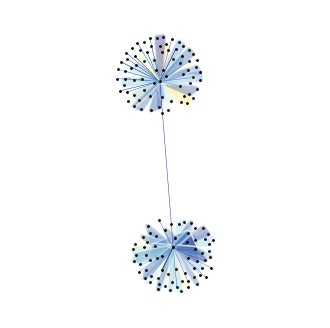

In [22]:
# 1. authors index in the most negative edge (indexing starts from 1)
edge = madstat.sort_values("hlrc").iloc[2,]["edges"]
targets = set(edge)

# 2. authors collaborated with those in the most negative edge
one_hop_mask = madstat['edges'].apply(lambda lst: bool(set(lst) & targets))
one_hop = madstat[one_hop_mask]

H = xgi.Hypergraph(one_hop['edges'].to_list())
node_pos = xgi.pairwise_spring_layout(H, seed=123, iterations=100)
cmap = matplotlib.colormaps.get_cmap('RdYlBu_r')
edge_color = {key: cmap((hlrc+1)/2) for key, hlrc in enumerate(one_hop['hlrc'])}

fig, ax = plt.subplots(figsize=(4,4))
xgi.draw( H, pos=node_pos, node_size=1, node_ec = "black", node_fc = 'black',
    edge_fc= edge_color,  edge_ec= "white", dyad_color=edge_color, # edge with size 2 color
    dyad_style="-", dyad_lw=0.35, alpha=0.4,
    hull = True, radius = 0.02, rescale_sizes=True);
# plt.savefig('figures/one-hop(Chien Fu Wu,Zhiliang Ying).pdf')

### Two-hop

In [15]:
one_hop_nodes = set(one_hop['edges'].explode())

two_hop_mask = madstat['edges'].apply(lambda lst: bool(set(lst) & one_hop_nodes))
two_hop = madstat[two_hop_mask]

In [16]:
H = xgi.Hypergraph(two_hop['edges'].to_list())
# node position
node_pos = xgi.pairwise_spring_layout(H, seed=123, iterations=100)
# edge color
cmap = matplotlib.colormaps.get_cmap('RdYlBu_r')
edge_color = {key: cmap((hlrc+1)/2) for key, hlrc in enumerate(two_hop['hlrc'])}

import numpy as np
R = np.array([[0, -1],
              [1,  0]])
node_pos_rot = {
    n: tuple(R.dot(np.array(pos)))
    for n, pos in node_pos.items()
}

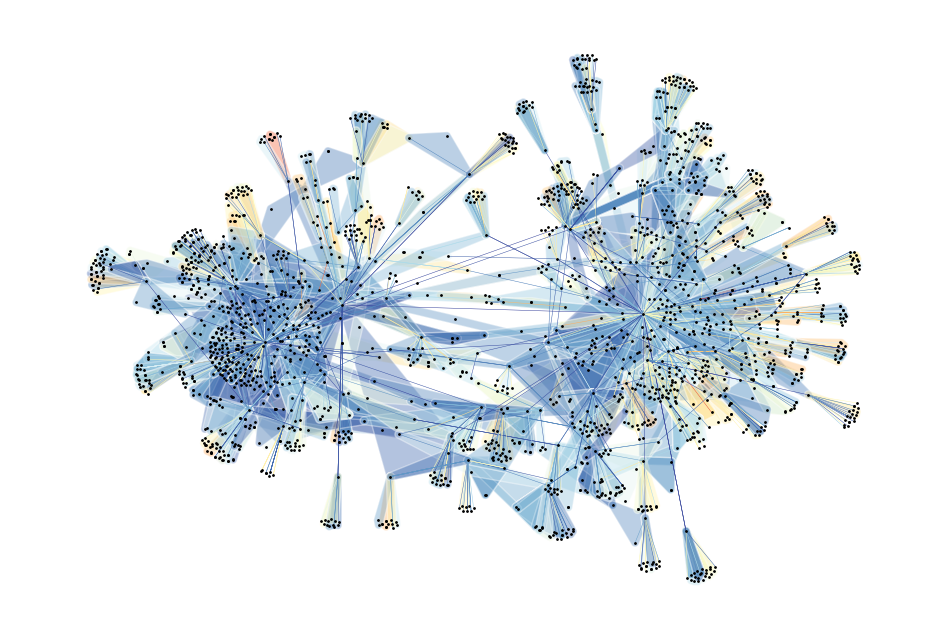

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
xgi.draw(H, pos=node_pos_rot, node_size=1,node_ec = "black",node_fc = 'black',
         edge_fc= edge_color,edge_ec= "white", dyad_color=edge_color, dyad_style="-", dyad_lw=0.35,
         alpha=0.4,hull = True,radius = 0.01,rescale_sizes=True);
plt.savefig('figures/two-hop.pdf')

## Stats of edges with HLRC<-0.95

In [55]:
import sys
import os
sys.path.append(os.path.abspath('/work/users/s/h/shiyi/hypergraph_with_curvature/code/src'))
from util import *

In [58]:
edges = madstat['edges'].to_list()
node_neigh = nodes_neighbors(edges)
neigh_size_dict = compute_neighborhood_sizes(edges, node_neigh)
neigh_df = pd.DataFrame.from_dict(neigh_size_dict,orient='index',
                                  columns=['common_neighbors', 'max_neighborhood_size', 'min_neighborhood_size'])

In [66]:
madstat_v2 = madstat.join(neigh_df)
id2name = Au['Au'].to_dict()
madstat_v2['author_names'] = madstat_v2['edges'].apply(lambda lst: [id2name[i-1] for i in lst])
madstat_v2.sort_values('hlrc').head(10)

,idxPap,edges,year,journal,hlrc,hfrc,common_neighbors,max_neighborhood_size,min_neighborhood_size,author_names
69721,69722,"[2040, 19151]",2002,JSPI,-0.976442,-387,0,186,55,"[Narayanaswamy Balakrishnan, M. C. Jones]"
74722,74723,"[3399, 11453]",1996,Sini,-0.976400,-189,0,101,73,"[Peter Bickel, Jianqing Fan]"
74667,74668,"[44493, 45659]",1997,Sini,-0.971376,-172,0,73,67,"[Chien Fu Wu, Zhiliang Ying]"
26161,26162,"[32910, 42916]",2002,JASA,-0.970089,-111,0,70,64,"[Adrian Raftery, Naisyin Wang]"
70452,70453,"[6386, 23886]",1998,JSPI,-0.969425,-137,0,75,58,"[Jiahua Chen, Dennis Lin]"
18334,18335,"[3399, 13608]",1990,AoS,-0.967783,-128,0,73,54,"[Peter Bickel, Jayanta K. Ghosh]"
23686,23687,"[8131, 8588]",2001,JTSA,-0.966484,-117,0,70,52,"[Noel Cressie, Michael Daniels]"
12637,12638,"[15060, 21675]",2014,JMVA,-0.966063,-168,0,61,57,"[Arjun Gupta, Debasis Kundu]"
37298,37299,"[15060, 21675]",2013,CSDA,-0.966063,-168,0,61,57,"[Arjun Gupta, Debasis Kundu]"
7164,7165,"[25984, 32615]",1978,Bka,-0.964461,-135,0,68,48,"[Kanti V. Mardia, Madan Puri]"
